In [2]:
#Create geographic visualization with geopandas and matplotlib

In [3]:
#import modules

In [1]:
import geopandas as gpd

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import os

In [8]:
import datetime

In [9]:
# importing statistics

In [10]:
import statistics as st

In [17]:
conda install geoplot


Note: you may need to restart the kernel to use updated packages.


In [18]:
conda install geoplot -c conda-forge


Note: you may need to restart the kernel to use updated packages.


In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
# Reading the shapefile

In [7]:
import pandas as pd

In [8]:
pd.DataFrame([('Alabama', 'AL'),
                   ('Arizona', 'AZ'),
                   ('California', 'CA'),
                   ('Connecticut', 'CT')],
           columns=('State', 'Abbreviation')
                 )

,State,Abbreviation
0,Alabama,AL
1,Arizona,AZ
2,California,CA
3,Connecticut,CT


In [10]:
def test_classification(self):
        training_pt = gpd.read_file(nc.points)

        df_points = self.stack_nc.extract_vector(gdf=training_pt)
        df_points["class_id"] = training_pt["id"]
        df_points = df_points.dropna()

        clf = RandomForestClassifier(n_estimators=50)
        X = df_points.drop(columns=["id", "class_id", "geometry"])
        y = df_points.class_id
        clf.fit(X, y)

In [12]:
def test_extract_points(self):
        training_pt = geopandas.read_file(nc.points)

        # check that extracted training data as array match known values
        ids, X, xys = self.stack.extract_vector(gdf=training_pt, return_array=True)
        
        self.assertTrue((X[~X[:, 0].mask, 0].data == training_pt["b1"].dropna().values).all())
        self.assertTrue((X[~X[:, 1].mask, 1].data == training_pt["b2"].dropna().values).all())
        self.assertTrue((X[~X[:, 2].mask, 2].data == training_pt["b3"].dropna().values).all())
        self.assertTrue((X[~X[:, 3].mask, 3].data == training_pt["b4"].dropna().values).all())
        self.assertTrue((X[~X[:, 4].mask, 4].data == training_pt["b5"].dropna().values).all())
        self.assertTrue((X[~X[:, 5].mask, 5].data == training_pt["b7"].dropna().values).all())

        # check that extracted training data as a DataFrame match known values
        df = self.stack.extract_vector(gdf=training_pt)
        
        self.assertTrue(df["lsat7_2000_10"].equals(training_pt["b1"]))
        self.assertTrue(df["lsat7_2000_20"].equals(training_pt["b2"]))
        self.assertTrue(df["lsat7_2000_30"].equals(training_pt["b3"]))
        self.assertTrue(df["lsat7_2000_40"].equals(training_pt["b4"]))
        self.assertTrue(df["lsat7_2000_50"].equals(training_pt["b5"]))
        self.assertTrue(df["lsat7_2000_70"].equals(training_pt["b7"])) 

In [13]:
def vcount(shpfile):
    df = gp.read_file(shpfile)
    if not df.size==0:
        for i, row in df.iterrows():
            # It's better to check if multigeometry
            multi = row.geometry.type.startswith("Multi")
            if multi:
                n = 0
                # iterate over all parts of multigeometry
                for part in row.geometry:
                    n += len(part.exterior.coords)
            else: # if single geometry like point, linestring or polygon
                n = len(row.geometry.exterior.coords)

            #print('Total vertices: {:,}'.format(n))
            overall.append(n)
        if all(i < 1000000 for i in overall)==True:
            return sum(overall)
        else:
            logger.warning(shpfile+' has overall max vertex of '+str(max(overall))+' with max allowed 1000000 ingest might fail')
            return sum(overall)
            #print('Total vertices per feature exceeded max. Overall vertices: {}'.format(sum(overall)))
            #return sum(overall)
    else:
        return df.size 

In [14]:
def load_geodataframe(geo_filename):
	""" 
	Load input GeoDataFrame

	Parameters
	----------
	geo_filename : string
		input GeoDataFrame filename

	Returns
	----------
	geopandas.GeoDataFrame
		loaded data

	"""
	# Load using geopandas
	df_osm_data = gpd.read_file(geo_filename)
	# Set None as NaN
	df_osm_data.fillna(value=np.nan, inplace=True)
	# Replace empty string (Json NULL sometimes read as '') for NaN
	df_osm_data.replace('', np.nan, inplace=True)
	
	def list_int_from_string(x): # List of integers given input in string format
		return [ int(id_) for id_ in x.split(",") ]
	def list_str_from_string(x): # List of strings given input in string format
		return x.split(",")

	# Recover list
	if ( "activity_category" in df_osm_data.columns): 
		df_osm_data[ "activity_category" ] = df_osm_data.activity_category.apply(lambda x: list_str_from_string(x) if pd.notnull(x) else np.nan )
	if ( "containing_parts" in df_osm_data.columns): 
		df_osm_data[ "containing_parts" ] = df_osm_data.containing_parts.apply( lambda x: list_int_from_string(x) if pd.notnull(x) else np.nan )
	if ( "containing_poi" in df_osm_data.columns): 
		df_osm_data[ "containing_poi" ] = df_osm_data.containing_poi.apply( lambda x: list_int_from_string(x) if pd.notnull(x) else np.nan )
	
	# To UTM coordinates
	return ox.project_gdf( df_osm_data ) 

In [15]:
def __load_country_shapes__():
    '''Load country shapes'''
    logger.info('Loading country shapes')
    # load shapefile for country shapes and get records
    world = geopandas.read_file(
        geopandas.datasets.get_path('naturalearth_lowres'))

    for _, country in world.iterrows():
        # Try to find the alpha 3 country code in the iso3166.
        # Sometimes it is not set ( value '-99'). Then we try to match by name.
        country_codes = iso3166.countries_by_alpha3.get(
            country['iso_a3'],
            iso3166.countries_by_name.get(country['name'].upper())
        )

        # log warning if the country is not found.
        if not country_codes:
            logger.warning('Unable to find %s', country['name'])
            continue

        # Save geometry as wkt string with both alpha 2 and 3 code as key.
        shape = country['geometry']
        __country_shapes__[country_codes.alpha2] = shape
        __country_shapes__[country_codes.alpha3] = shape 

In [17]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [25]:
usa = gpd.read_file('C:/Users/wicke/OneDrive/Desktop/GIS Files/States_shapefile.shp')

In [27]:
usa.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [28]:
usa.tail(2)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
49,50,WI-ESR,WI,WISCONSIN,F,968,"MULTIPOLYGON (((-87.74855 44.96162, -87.83999 ..."
50,51,None,WY,WYOMING,N,969,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."


<AxesSubplot:>

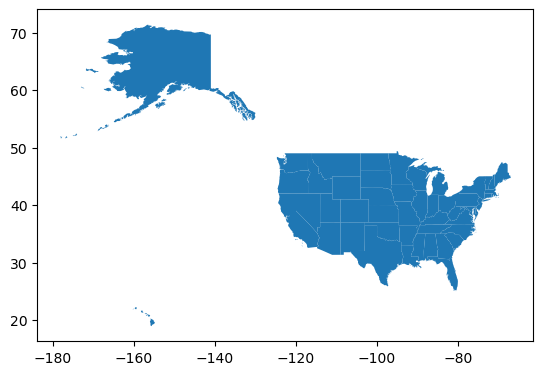

In [29]:
usa.plot()

<AxesSubplot:>

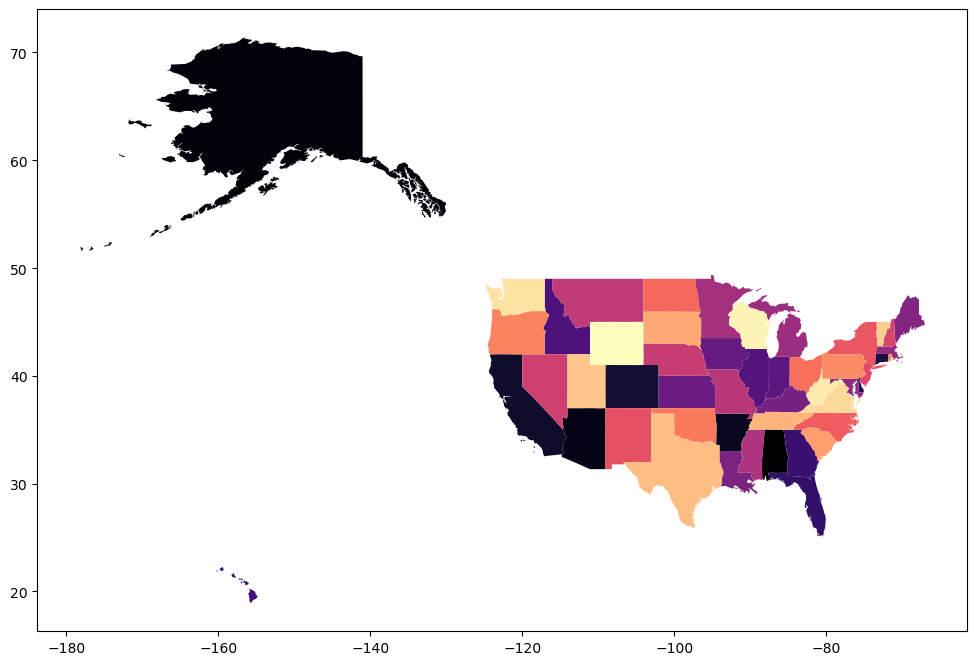

In [38]:
usa.plot(cmap='magma', figsize=(12, 12))

NameError: name 'west' is not defined

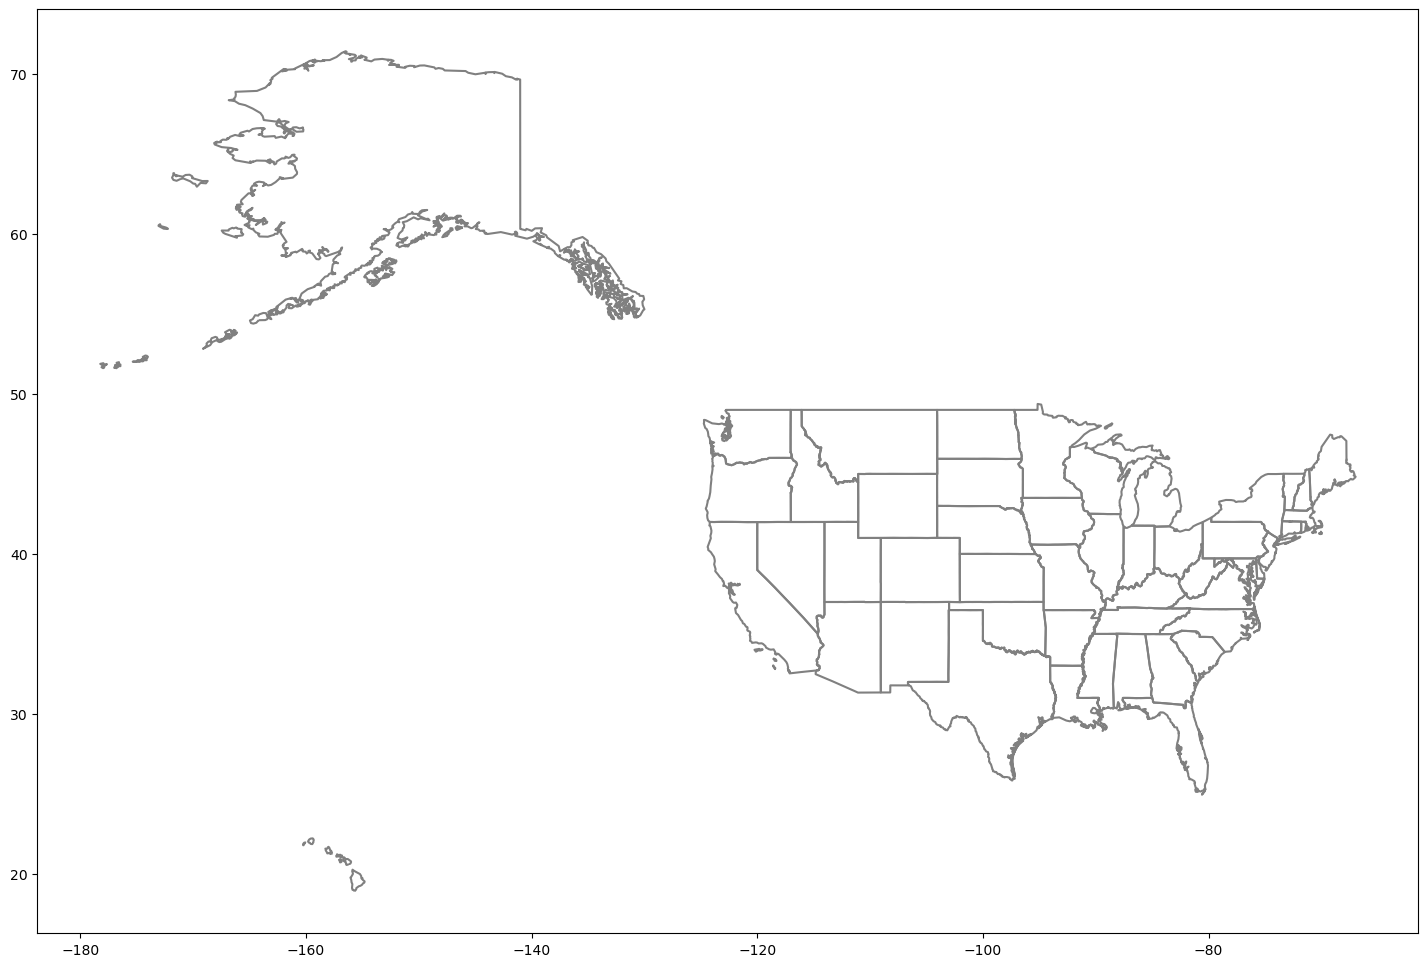

In [47]:
usa = usa.boundary.plot(figsize=(18, 12), color="Gray")
west.plot(ax=us_boundary_map,  color="DarkGray")

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
printed_names = []
for shapedict,state in zip(m.states_info, m.states):
    short_name = short_state_names.keys()[short_state_names.values().index(shapedict['NAME'])]
    if short_name in printed_names: continue
    # center of polygon
    x, y = np.array(state).mean(axis=0)
    # You have to align x,y manually to avoid overlapping for little states
    plt.text(x+.1, y, short_name, ha="center")
    printed_names += [short_name,] 

m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
plt.title('The United States of North America')
plt.show()

NameError: name 'Basemap' is not defined